In [28]:
import pandas as pd
import json
import numpy as np
def load_config(path):
    with open(path, 'r') as file:
        return json.load(file)

config_path = '../pandas_config.json'
config = load_config(config_path)
parquet_config = config['parquet']

# Setting up the engine as a global constant
ENGINE = parquet_config['engine']
COMPRESSION = parquet_config['compression']
FILE_PATH = "../data/data_parquet"

In [29]:
weights = pd.read_parquet(f"{FILE_PATH}/weights.parquet", engine=ENGINE)

In [69]:
weights_df = weights.map(lambda x: None if isinstance(x, np.ndarray) and x.size == 0 else x)

<Axes: >

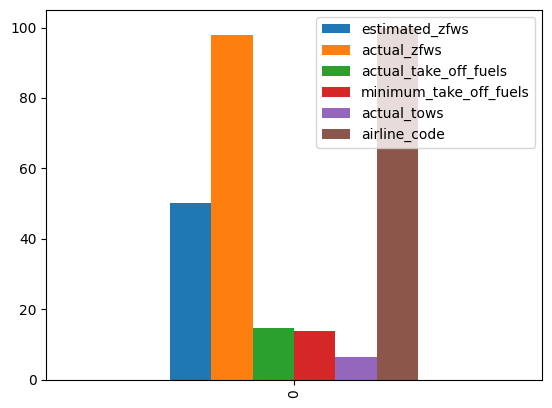

In [87]:
filled_percentages_over_all_flight_ids = weights_df.notnull().mean() * 100
filled_percentages_over_all_flight_ids = filled_percentages_over_all_flight_ids.to_frame().transpose()
filled_percentages_over_all_flight_ids.drop(columns=["flight_id", "flight_number"], inplace=True)
filled_percentages_over_all_flight_ids
filled_percentages_over_all_flight_ids.plot(kind="bar")

<Axes: xlabel='airline_code'>

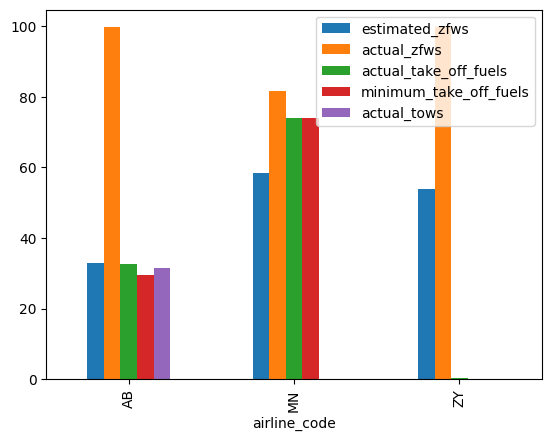

In [75]:
filled_percentage_by_airline = weights_df.groupby('airline_code', group_keys=False).apply(lambda group: group.notnull().mean() * 100, include_groups=False).drop(columns=["flight_number", "flight_id"])
filled_percentage_by_airline.plot(kind='bar')

<Axes: xlabel='airline_code'>

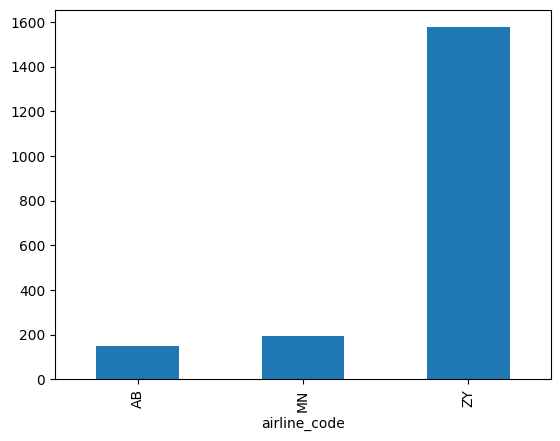

In [76]:
flight_numbers_by_airline = weights_df.groupby('airline_code', group_keys=False).apply(lambda group: group['flight_number'].nunique(), include_groups=False)
flight_numbers_by_airline.plot(kind='bar')